# Forecasting Exercises - Solutions

This time we're using a seasonal time series of California Hospitality Industry Employees.

<div class="alert alert-danger" style="margin: 10px"><strong>IMPORTANT NOTE!</strong> Make sure you don't run the cells directly above the example output shown, <br>otherwise you will end up writing over the example output!</div>

In [20]:
# RUN THIS CELL
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline



# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [13]:
# Load datasets
df = pd.read_csv('HospitalityEmployees.csv',index_col='Date',parse_dates=True)
df.index.freq = 'MS'
print(len(df))
df.head()

348


,Employees
Date,
1990-01-01,1064.5
1990-02-01,1074.5
1990-03-01,1090.0
1990-04-01,1097.4
1990-05-01,1108.7


So <tt>df</tt> has 348 records and one column. The data represents the number of employees in thousands of persons as monthly averages from January, 1990 to December 2018.

### 1. Plot the source data
Create a line chart of the dataset. Optional: add a title and y-axis label.

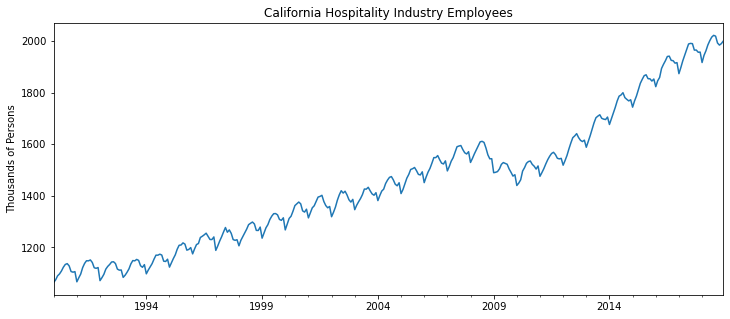

In [14]:
# DON'T WRITE HERE
title='California Hospitality Industry Employees'
ylabel='Thousands of Persons'
xlabel='' # we don't really need a label here

ax = df[____].plot(figsize=(12,5),title=____)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=_____, ylabel=____);

### 2. Run an ETS Decomposition
Use an 'additive' model.

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose      # for ETS Plots


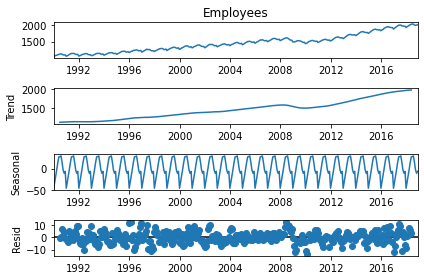

In [16]:
# DON'T WRITE HERE
result = seasonal_decompose(____, model=____)
result.plot();

Based on the previous two plots, do you think the data is stationary? Explain why or why not.

In [40]:
# your answer here




### 3. Use the <tt>test_staionarity</tt>  function below to determine if the data is stationary.

In [21]:
from statsmodels.tsa.stattools import adfuller

# This funciton provides you with many different types 
# of information to evaluate the stationarity of the data

def test_stationarity(timeseries, window):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=window).mean()
    rolstd = timeseries.rolling(window=window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries.iloc[window:], color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

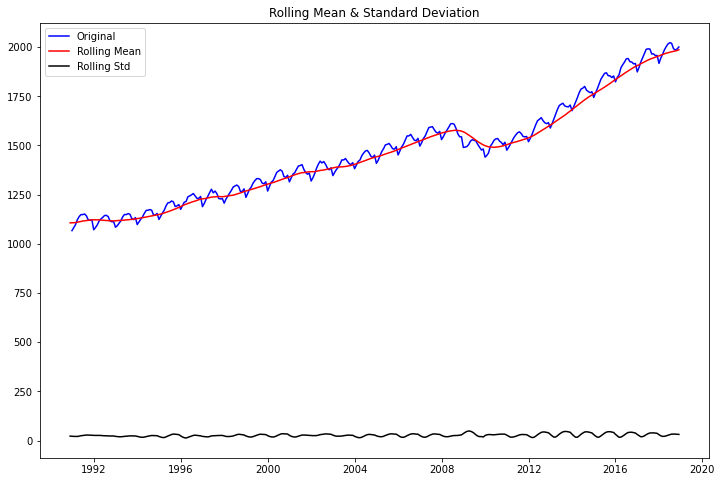

Results of Dickey-Fuller Test:
Test Statistic                   0.901284
p-value                          0.993107
#Lags Used                      17.000000
Number of Observations Used    330.000000
Critical Value (1%)             -3.450322
Critical Value (5%)             -2.870338
Critical Value (10%)            -2.571458
dtype: float64


In [22]:
# the second argument of this function determines how many time periods 
# you want to use when creating the rolling mean and std. 
# play with different values for this window and see how it changes the graphs 
test_stationarity(____, ____)

**Based on the ifrmation provided above, do you think the data set is stationary?**

In [39]:
# your answer here



### 4. Transform the data to make it more stationary. After doing so, rerun the function to see if your transformation worked. 

Some possible data transformations are subtractings the moving average, taking a first difference, taking a seasonal difference, or doing all of them. 

In [ ]:
# transformation code

In [41]:
# run the test_stationarity on your transformed data

### 5. Split the data into train/test sets
Set one year (24 records) for testing. There is more than one way to do this!

In [43]:
# DON'T WRITE HERE
train = df.iloc[____]
test = df.iloc[____]

In [44]:
print(train.shape)
print(test.shape)

(324, 1)
(24, 1)


### 5. Using the pre-written code below, determine which set of parameters creates the best model based on the AIC score, and use those parameters to fit a new model.

In [45]:
import itertools

p = q = range(0, 3)
pdq = list(itertools.product(p, [1], q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, [1], q))]
print('Examples of parameter for SARIMA...')
for i in pdq:
    for s in seasonal_pdq:
        print('SARIMAX: {} x {}'.format(i, s))

Examples of parameter for SARIMA...
SARIMAX: (0, 1, 0) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (0, 1, 2, 12)
SARIMAX: (0, 1, 0) x (1, 1, 0, 12)
SARIMAX: (0, 1, 0) x (1, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 1, 2, 12)
SARIMAX: (0, 1, 0) x (2, 1, 0, 12)
SARIMAX: (0, 1, 0) x (2, 1, 1, 12)
SARIMAX: (0, 1, 0) x (2, 1, 2, 12)
SARIMAX: (0, 1, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 1) x (0, 1, 1, 12)
SARIMAX: (0, 1, 1) x (0, 1, 2, 12)
SARIMAX: (0, 1, 1) x (1, 1, 0, 12)
SARIMAX: (0, 1, 1) x (1, 1, 1, 12)
SARIMAX: (0, 1, 1) x (1, 1, 2, 12)
SARIMAX: (0, 1, 1) x (2, 1, 0, 12)
SARIMAX: (0, 1, 1) x (2, 1, 1, 12)
SARIMAX: (0, 1, 1) x (2, 1, 2, 12)
SARIMAX: (0, 1, 2) x (0, 1, 0, 12)
SARIMAX: (0, 1, 2) x (0, 1, 1, 12)
SARIMAX: (0, 1, 2) x (0, 1, 2, 12)
SARIMAX: (0, 1, 2) x (1, 1, 0, 12)
SARIMAX: (0, 1, 2) x (1, 1, 1, 12)
SARIMAX: (0, 1, 2) x (1, 1, 2, 12)
SARIMAX: (0, 1, 2) x (2, 1, 0, 12)
SARIMAX: (0, 1, 2) x (2, 1, 1, 12)
SARIMAX: (0, 1, 2) x (2, 1, 2, 12)
SARIMAX: (1, 1, 0) 

In [46]:
# Load specific forecasting tools
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [1]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod=SARIMAX(train,
                         order=param,
                         seasonal_order=param_seasonal,
                         enforce_stationarity=False,
                         enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param,param_seasonal,results.aic))
        except: 
            print('Oops!')
            continue

NameError: name 'pdq' is not defined

In [49]:
sari_mod =SARIMAX(train,
                  order=(____, ____, ____),
                  seasonal_order=(____, ____, ____, 12),
                  enforce_stationarity=False,
                  enforce_invertibility=False).fit()

### 6. Obtain predicted values

In [50]:
# Your predictions need to start at the end of the training data and go to the end.
start=len(____)
end=len(____)+len(____)-1
predictions = sari_mod.predict(start=____, end=____, dynamic=False, typ='levels').rename('SARIMA Predictions')

### 7. Plot predictions against known values
Optional: add a title and y-axis label.

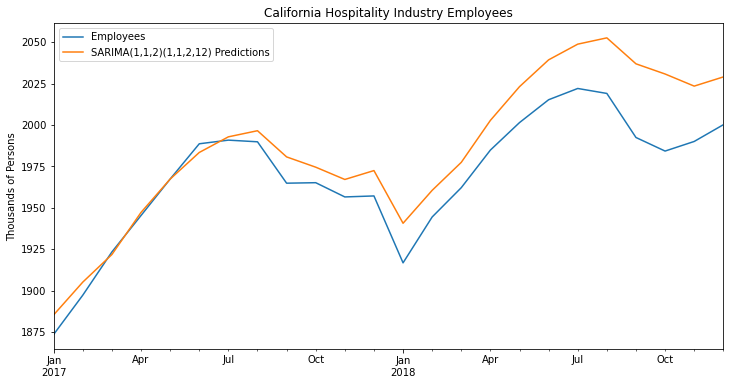

In [51]:
# DON'T WRITE HERE
title='California Hospitality Industry Employees'
ylabel='Thousands of Persons'
xlabel=''

ax = test['Employees'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

### 8. Evaluate the Model using MSE and RMSE
You can run both from the same cell if you want.

In [52]:
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

In [53]:
# DON'T WRITE HERE
error1 = mean_squared_error(test[____], ____)
error2 = rmse(test[____], ____)
print(f'SARIMA MSE Error: {error1:11.10}')
print(f'SARIMA RMSE Error: {error2:11.10}')

SARIMA(1, 1, 2)x(1, 1, 2, 12) MSE Error: 472.7001757
SARIMA(1, 1, 2)x(1, 1, 2, 12) RMSE Error: 21.74166911


### 9. Retrain the model on the full data and forecast one year into the future

In [54]:
model = SARIMAX(df['____'],order=(____, ____, ____),seasonal_order=(____, ____, ____, ____))
results = model.fit()
fcast = results.predict(len(df),len(df)+11,typ='levels').rename('SARIMA Forecast')

### 10. Plot the forecasted values alongside the original data
Optional: add a title and y-axis label.

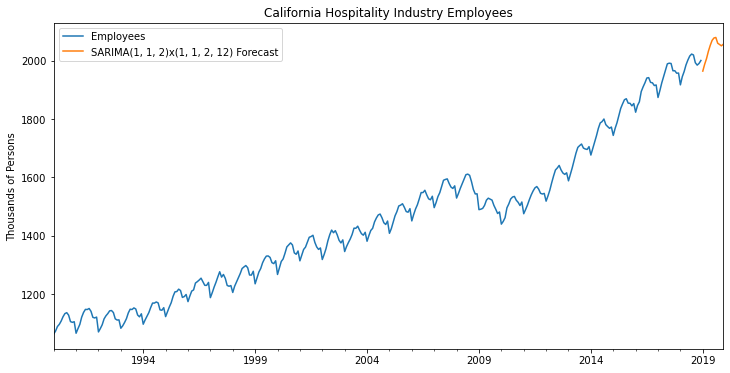

In [55]:
# DON'T WRITE HERE
title='California Hospitality Industry Employees'
ylabel='Thousands of Persons'
xlabel=''

ax = ____.plot(legend=True,figsize=(12,6),title=____)
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=____, ylabel=____);

## Great job!